In [27]:
print("jupiter is working")

jupiter is working


In [28]:
!pip install pandas numpy matplotlib scikit-learn

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Fitness data analytics started")

Fitness data analytics started


In [30]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations and random data generation
import matplotlib.pyplot as plt  # For data visualization
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets
from sklearn.linear_model import LinearRegression  # For the ML model
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation

# Generate a realistic sample dataset (150 rows) since no CSV is provided
# Columns: Date, Steps, Calories_Burned, Heart_Rate, Duration_Minutes
np.random.seed(42)  # For reproducible random data

# Generate dates: 150 days starting from 2023-01-01
dates = pd.date_range(start='2023-01-01', periods=150, freq='D')

# Generate Steps: Random between 2000 and 15000
steps = np.random.randint(2000, 15001, size=150)

# Generate Heart_Rate: Random between 60 and 180 (bpm)
heart_rate = np.random.randint(60, 181, size=150)

# Generate Duration_Minutes: Random between 10 and 120 minutes
duration = np.random.randint(10, 121, size=150)

# Generate Calories_Burned: Correlated with steps, heart_rate, and duration (realistic formula)
# Simple formula: base calories + factors for steps, HR, duration
calories_burned = (steps * 0.04) + (heart_rate * 0.5) + (duration * 2) + np.random.normal(0, 50, 150)
calories_burned = np.maximum(calories_burned, 100)  # Ensure positive values

# Create the DataFrame
data = pd.DataFrame({
    'Date': dates,
    'Steps': steps,
    'Calories_Burned': calories_burned,
    'Heart_Rate': heart_rate,
    'Duration_Minutes': duration
})

# Display the first 5 rows
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
        Date  Steps  Calories_Burned  Heart_Rate  Duration_Minutes
0 2023-01-01   9270       656.231973          73               114
1 2023-01-02   2860       242.991038         162                42
2 2023-01-03   7390       346.505602          86                49
3 2023-01-04   7191       441.025854          68                48
4 2023-01-05  13964       731.988303         138                91


In [31]:
# Check data types and missing values
print("\nData types:")
print(data.dtypes)

print("\nMissing values:")
print(data.isnull().sum())

# Clean data if needed (no missing values in generated data, but this is a good practice)
# For this dataset, no cleaning is required as it's generated without issues.

# Convert Date column to datetime (it's already datetime, but ensure it)
data['Date'] = pd.to_datetime(data['Date'])

# Create a new column for Week (week of the year)
data['Week'] = data['Date'].dt.isocalendar().week

# Show summary statistics
print("\nSummary statistics:")
print(data.describe())

# Extract insights
total_steps = data['Steps'].sum()
average_heart_rate = data['Heart_Rate'].mean()
total_calories = data['Calories_Burned'].sum()
most_active_day = data.loc[data['Steps'].idxmax(), 'Date'].strftime('%Y-%m-%d')
average_daily_steps = data['Steps'].mean()

# Weekly activity summary (total steps per week)
weekly_summary = data.groupby('Week')['Steps'].sum().reset_index()
weekly_summary.columns = ['Week', 'Total_Steps']

print(f"\nInsights:")
print(f"- Total steps: {total_steps}")
print(f"- Average heart rate: {average_heart_rate:.2f} bpm")
print(f"- Total calories burned: {total_calories:.2f}")
print(f"- Most active day (highest steps): {most_active_day}")
print(f"- Average daily steps: {average_daily_steps:.2f}")
print(f"\nWeekly activity summary (total steps per week):")
print(weekly_summary)


Data types:
Date                datetime64[ns]
Steps                        int32
Calories_Burned            float64
Heart_Rate                   int32
Duration_Minutes             int32
dtype: object

Missing values:
Date                0
Steps               0
Calories_Burned     0
Heart_Rate          0
Duration_Minutes    0
dtype: int64

Summary statistics:
                      Date         Steps  Calories_Burned  Heart_Rate  \
count                  150    150.000000       150.000000  150.000000   
mean   2023-03-16 12:00:00   8612.653333       530.655440  121.593333   
min    2023-01-01 00:00:00   2064.000000       116.620332   60.000000   
25%    2023-02-07 06:00:00   5427.750000       390.795560   91.000000   
50%    2023-03-16 12:00:00   8868.000000       533.428247  121.000000   
75%    2023-04-22 18:00:00  11682.750000       640.632480  155.000000   
max    2023-05-30 00:00:00  14990.000000       913.532434  180.000000   
std                    NaN   3653.158834       172.82

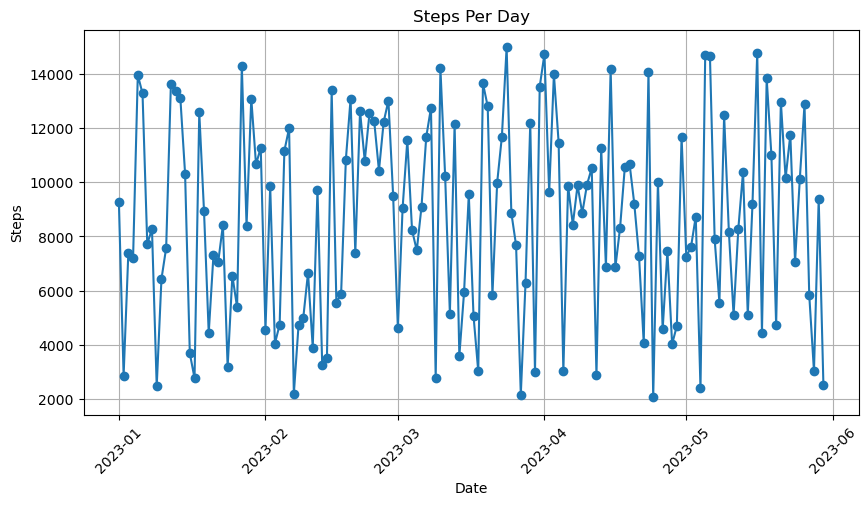

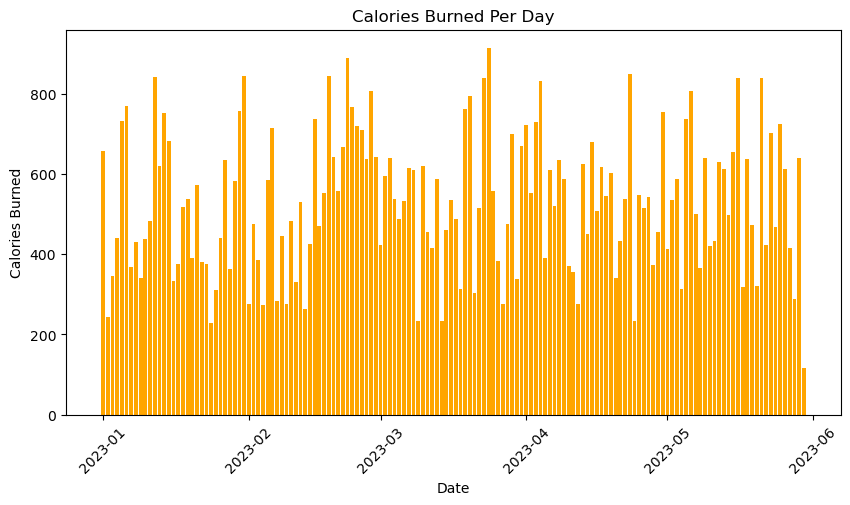

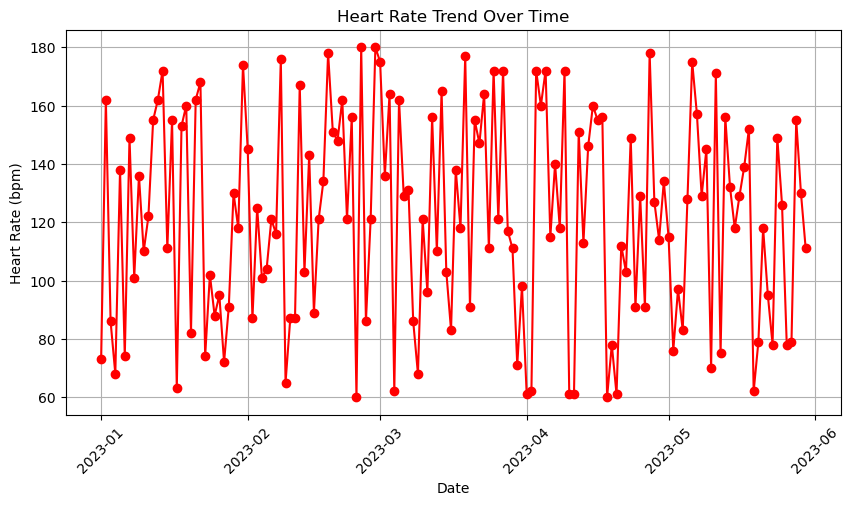

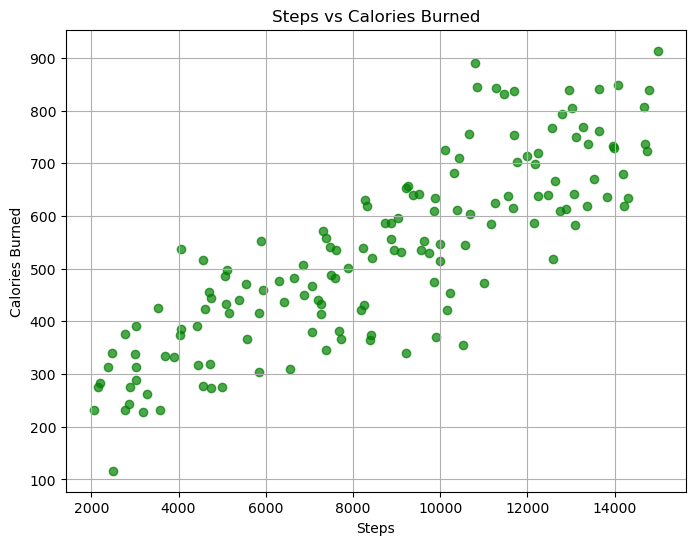

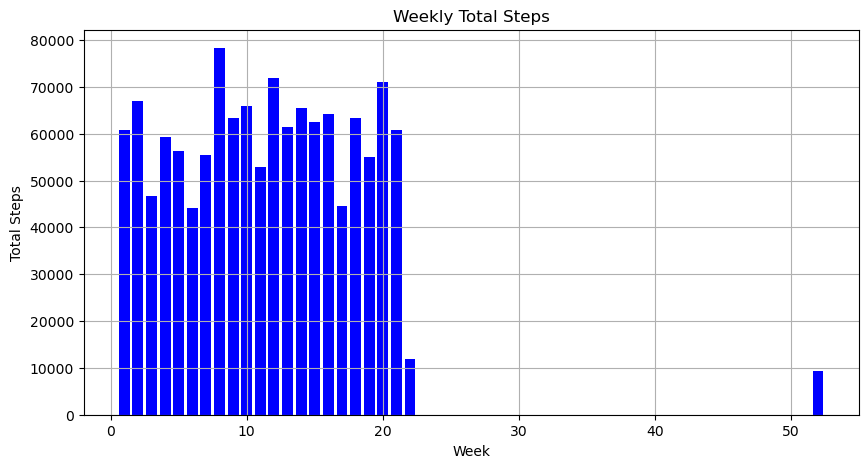

In [32]:
# Set up matplotlib for inline display in Jupyter
%matplotlib inline

# Line chart: Steps per day
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['Steps'], marker='o', linestyle='-')
plt.title('Steps Per Day')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Bar chart: Calories burned per day
plt.figure(figsize=(10, 5))
plt.bar(data['Date'], data['Calories_Burned'], color='orange')
plt.title('Calories Burned Per Day')
plt.xlabel('Date')
plt.ylabel('Calories Burned')
plt.xticks(rotation=45)
plt.show()

# Line chart: Heart rate trend
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['Heart_Rate'], marker='o', linestyle='-', color='red')
plt.title('Heart Rate Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Heart Rate (bpm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Scatter plot: Steps vs Calories burned
plt.figure(figsize=(8, 6))
plt.scatter(data['Steps'], data['Calories_Burned'], alpha=0.7, color='green')
plt.title('Steps vs Calories Burned')
plt.xlabel('Steps')
plt.ylabel('Calories Burned')
plt.grid(True)
plt.show()

# Weekly total steps graph (bar chart)
plt.figure(figsize=(10, 5))
plt.bar(weekly_summary['Week'], weekly_summary['Total_Steps'], color='blue')
plt.title('Weekly Total Steps')
plt.xlabel('Week')
plt.ylabel('Total Steps')
plt.grid(True)
plt.show()

In [33]:
# Define input features (X) and target (y)
X = data[['Steps', 'Heart_Rate', 'Duration_Minutes']]  # Features
y = data['Calories_Burned']  # Target

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation:")
print(f"- Mean Squared Error (MSE): {mse:.2f}")
print(f"- R-squared (Accuracy Score): {r2:.2f}")

Model Evaluation:
- Mean Squared Error (MSE): 2613.29
- R-squared (Accuracy Score): 0.89


In [34]:
# Predict calories burned for a sample input: 8000 steps, 110 heart rate, 45 minutes
sample_input = pd.DataFrame([[8000, 110, 45]], columns=['Steps', 'Heart_Rate', 'Duration_Minutes'])
predicted_calories = model.predict(sample_input)[0]

print(f"\nPredicted calories burned for a sample workout (8000 steps, 110 bpm heart rate, 45 minutes): {predicted_calories:.2f}")# Predict calories burned for a sample input: 8000 steps, 110 heart rate, 45 minutes
sample_input = pd.DataFrame([[8000, 110, 45]], columns=['Steps', 'Heart_Rate', 'Duration_Minutes'])
predicted_calories = model.predict(sample_input)[0]

print(f"\nPredicted calories burned for a sample workout (8000 steps, 110 bpm heart rate, 45 minutes): {predicted_calories:.2f}")# Predict calories burned for a sample input: 8000 steps, 110 heart rate, 45 minutes
sample_input = pd.DataFrame([[8000, 110, 45]], columns=['Steps', 'Heart_Rate', 'Duration_Minutes'])
predicted_calories = model.predict(sample_input)[0]

print(f"\nPredicted calories burned for a sample workout (8000 steps, 110 bpm heart rate, 45 minutes): {predicted_calories:.2f}")



Predicted calories burned for a sample workout (8000 steps, 110 bpm heart rate, 45 minutes): 453.28

Predicted calories burned for a sample workout (8000 steps, 110 bpm heart rate, 45 minutes): 453.28

Predicted calories burned for a sample workout (8000 steps, 110 bpm heart rate, 45 minutes): 453.28
